# The Battle of Indian States - Tamil Nadu and Kerala


In this assignment, we are going to explore, segment, and cluster the two southernmost states in India, namely, Tamil Nadu and Kerala.
***

## Table of contents
* [Introduction](#introduction)
* [Business Problem](#business)
* [Data](#data)
* [Methodology](#methodology)
* [Discussion](#discussion)
* [Conclusion](#conclusion)

## Introduction <a name="introduction"></a>
***

In this project, we will look at two southern states in India, namely Tamil Nadu and Kerala. There are some of the large districts in these states for residential, tourism, culture, etc. Southern India is spread over n area of 635,780 Sq Km and is filled with a lot of culture and traditions. Let's see more information on the two states that we would be focusing on.

**Tamil Nadu :** formerly Madras State, is one of the 29 states of India. Its capital city is Chennai (formerly known as Madras). Tamil Nadu lies in the southernmost part of the Indian subcontinent and is bordered by the union territory of Puducherry and the South Indian states of Kerala, Karnataka, and Andhra Pradesh. It is bounded by the Eastern Ghats on the north, by the Nilgiri Mountains, the Meghamalai Hills, and Kerala on the west, by the Bay of Bengal in the east, by the Gulf of Mannar and the Palk Strait on the southeast, and by the Indian Ocean on the south. The state shares a maritime border with the nation of Sri Lanka. (https://en.wikipedia.org/wiki/Tamil_Nadu)

**Kerala :** is a state on the southwestern Malabar Coast of India. It was formed on 1 November 1956, following the passage of the States Reorganisation Act, by combining Malayalam-speaking regions. Kerala is the twenty-second largest Indian state by area. It is bordered by Karnataka to the north and northeast, Tamil Nadu to the east and south, and the Lakshadweep Sea to the west. Malayalam is the most widely spoken language and is also the official language of the state.(https://en.wikipedia.org/wiki/Kerala)


## Business Problem <a name="business"></a>
***

In this project, we will analyze the two southernmost states of India. We will use Foursquare data as well as machine learning algorithms such as segmentation and clustering to help us complete this study. The reason for the undertaking is to group the most well-known venues in both these Indian states. This project can help us identify the similarities as well as the disimlarities for the two states and also to classify the various districts in these states.

## Data <a name="data"></a>
***

The data needed for this project has been obtained from Wikipedia as well as Census 2011. We have also used the geocoder to derive the latitude and longitude of the districts in Tamil Nadu and Kerala. All these acquired data are processed, so as to get  clean data to make the analysis process easier and then is stored in a single data frame. The webpages from where the required data has been collected are :

[Tamil Nadu Districts - Wikipedia Data](https://simple.wikipedia.org/wiki/List_of_districts_in_Tamil_Nadu)

[Tamil Nadu Districts - Census 2011 Data](https://www.census2011.co.in/census/state/districtlist/tamil+nadu.html)

[Kerala Districts - Wikipedia Data](https://en.wikipedia.org/wiki/List_of_districts_in_Kerala)

[Kerala Districts - Census 2011 Data](https://www.census2011.co.in/census/state/districtlist/kerala.html)

We have also used information from Foursqure to derive the venues in all the districts. It can also help us to find the most common locations in these districts.

### ~Download and Explore the dataset

Load all the libraries required for this project to be accomplished.

In [1]:
#!conda install -c conda-forge folium=0.5.0 --yes
import pandas as pd  # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import requests
import folium # map rendering library
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# import k-means from clustering stage
from sklearn.cluster import KMeans
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
from matplotlib import pyplot as plt
import matplotlib.colors as colors
# To render maps
from  geopy.geocoders import Nominatim
# scrape data from Webpages
from bs4 import BeautifulSoup 

### ~Scrape the data from webpages and transform the data

Scrape the Wikipedia page for the details on Tamil Nadu Districts. From wikipedia using Beautiful Soup library, we can retrieve the population and the area of the ditricts in Tamil Nadu. Finally, load the retrieved data to a pandas dataframe.

In [2]:
website_text = requests.get('https://simple.wikipedia.org/wiki/List_of_districts_in_Tamil_Nadu').text
soup = BeautifulSoup(website_text,'xml')

table = soup.find('table',{'class':'wikitable sortable'})
table_rows = table.find_all('tr')

data = []
for row in table_rows:
    data.append([t.text.strip() for t in row.find_all('td')])

df_TN = pd.DataFrame(data, columns=['No', 'District','Code', 'Headquarters', 'Established','Formed From','Area_sq_km','Population','Population Density','Taluks','Map' ])
df_TN.head()

,No,District,Code,Headquarters,Established,Formed From,Area_sq_km,Population,Population Density,Taluks,Map
0,None,None,None,None,None,None,None,None,None,None,None
1,1.,Ariyalur,AR,Ariyalur,23 November 2007,Perambalur district,"1,949.31","754,894[1]",387,Ariyalur\nUdayarpalayam\nSendurai,
2,2.,Chennai,CH,—[2],1 November 1956,One of the original 13 districts,426,"4,646,732[3]",26105,Tiruvottiyur\nMadhavaram\nTondiarpet\nPerambur...,
3,3.,Coimbatore,CO,Coimbatore,1 November 1956,One of the original 13 districts,"4,723[4]","3,458,045[5]",732,Mettupalayam taluk\nCoimbatore-North taluk\nCo...,
4,4.,Cuddalore,CU,Cuddalore,30 September 1993,South Arcot district,"3,678","2,605,914[7]",709,Cuddalore\nPanruti\nChidambaram\nKattumannarko...,


Clean the Tamil Nadu data that was retrieved above.

In [3]:
#Drop the columns which are not required
df_TN = df_TN.drop(['Population Density','Code','No', 'Headquarters', 'Established','Formed From','Population Density','Taluks','Map'], axis=1)
#Add a column with the state name
df_TN['State'] = 'Tamil Nadu'
#Reorder the columns
df_TN=df_TN[['State','District','Population','Area_sq_km']]

#Remove the rows with the null/None values
df_TN = df_TN[~df_TN['District'].isnull()].reset_index(drop=True)

#Clean the Area values. 
#Area values has [*] in the raw data, which we need to remove
df_TN['Area_sq_km'] = df_TN['Area_sq_km'].str.split('[').str[0]
#Remove the commas in Area value
df_TN['Area_sq_km']=df_TN['Area_sq_km'].str.replace(',', '')
#Convert the Area values to integer
df_TN['Area_sq_km']=pd.to_numeric(df_TN['Area_sq_km'],errors='coerce')
df_TN['Area_sq_km']=df_TN['Area_sq_km'].astype(np.int64)

#Clean the Population values. 
#Population values has [*] in the raw data, which we need to remove
df_TN['Population'] = df_TN['Population'].str.split('[').str[0]
#Remove the commas in Population value
df_TN['Population']=df_TN['Population'].str.replace(',', '')
#Convert the Population values to integer
df_TN['Population']=pd.to_numeric(df_TN['Population'])

df_TN.head()

,State,District,Population,Area_sq_km
0,Tamil Nadu,Ariyalur,754894,1949
1,Tamil Nadu,Chennai,4646732,426
2,Tamil Nadu,Coimbatore,3458045,4723
3,Tamil Nadu,Cuddalore,2605914,3678
4,Tamil Nadu,Dharmapuri,1506843,4497


Scrape the Wikipedia page for the details on Kerala Districts. From wikipedia using Beautiful Soup library, we can retrieve the population and the area of the ditricts in Kerala. Finally, load the retrieved data to a pandas dataframe.

In [4]:
website_text = requests.get('https://en.wikipedia.org/wiki/List_of_districts_in_Kerala').text
soup = BeautifulSoup(website_text,'xml')

table = soup.find('table',{'class':'wikitable sortable'})
table_rows = table.find_all('tr')

data = []
for row in table_rows:
    data.append([t.text.strip() for t in row.find_all('td')])
    
df_Kerala = pd.DataFrame(data, columns=['Code', 'District', 'Headquarters', 'Established','Subdivison','Population','Area_sq_km','Population Density' ])
df_Kerala.head()

,Code,District,Headquarters,Established,Subdivison,Population,Area_sq_km,Population Density
0,None,None,None,None,None,None,None,None
1,AL,Alappuzha,Alappuzha,17 Aug 1957[5],6 Taluks[5]\nAmbalapuzha (Alappuzha)\nChengann...,"2,121,943","1,414 km2 (546 sq mi)","1,501/km2 (3,890/sq mi)"
2,ER,Ernakulam,Kakkanad,1 Apr 1958[6],7 Taluks[7]\nAluva\nKanayannur (Ernakulam)\nKo...,"3,279,860","2,407 km2 (929 sq mi)","1,069/km2 (2,770/sq mi)"
3,ID,Idukki,Painavu,26 Jan 1972[8][9],5 Taluks\nDevikulam\nPeermade\nUdumbanchola (N...,"1,107,453","4,358 km2 (1,683 sq mi)",254/km2 (660/sq mi)
4,KN,Kannur,Kannur,1 Jan 1957[10],5 Taluks[10]\nThalassery\nIritty\nKannur\nTha...,"2,525,637","2,966 km2 (1,145 sq mi)","852/km2 (2,210/sq mi)"


Clean the Kerala data that was retrieved above.

In [5]:
#Drop the columns which are not required
df_Kerala = df_Kerala.drop(['Population Density','Code', 'Established','Subdivison', 'Headquarters'], axis=1)
#Add a column with the state name
df_Kerala['State'] = 'Kerala'
#Reorder the columns
df_Kerala=df_Kerala[['State','District','Population','Area_sq_km']]

#Remove the rows with the null/None values
df_Kerala = df_Kerala[~df_Kerala['District'].isnull()].reset_index(drop=True)

#Clean the Area values. 
#Remove the characters that come after 'k' in the Area values
df_Kerala['Area_sq_km'] = df_Kerala['Area_sq_km'].str.split('k').str[0]
#Remove the commas in Area value
df_Kerala['Area_sq_km']=df_Kerala['Area_sq_km'].str.replace(',', '')
#Convert the Area values to integer
df_Kerala['Area_sq_km']=df_Kerala['Area_sq_km'].astype(np.int64)

#Clean the Population values.
#Remove the commas in Population value
df_Kerala['Population']=df_Kerala['Population'].str.replace(',', '')
#Convert the Population values to integer
df_Kerala['Population']=pd.to_numeric(df_Kerala['Population'])

df_Kerala.head()

,State,District,Population,Area_sq_km
0,Kerala,Alappuzha,2121943,1414
1,Kerala,Ernakulam,3279860,2407
2,Kerala,Idukki,1107453,4358
3,Kerala,Kannur,2525637,2966
4,Kerala,Kasaragod,1302600,1992


Merge the two dataframes into one dataframe for analysis

In [6]:
frames = [df_TN, df_Kerala]
df = pd.concat(frames).reset_index(drop=True)

Scrape more information on the districts from the Census 2011 website using Python's Beautiful Soup library. From this webpage, we can get the record on the sex ratio as well as the literacy percentage district-wise. Finally, load the retrieved data into a pandas dataframe and also clean the data, so that it is suitable for analysis purpose.

In [7]:
#Load the Tamil Nadu Data to a dataframe
website_text = requests.get('https://www.census2011.co.in/census/state/districtlist/tamil+nadu.html').text
soup = BeautifulSoup(website_text,'xml')

table = soup.find('table')
table_rows = table.find_all('tr')

data = []
for row in table_rows:
    data.append([t.text.strip() for t in row.find_all('td')])

df_TN = pd.DataFrame(data, columns=['#', 'District Name', 'Sub-Districts', 'Population','Increase' ,'Sex Ratio','Literacy','Density'])

#Remove the unwanted columns
df_TN = df_TN.drop(['Sub-Districts','#','Increase','Density', 'Population' ,'Sex Ratio'], axis=1)
#Remove the rows with the null/None values
df_TN = df_TN[~df_TN['District Name'].isnull()].reset_index(drop=True)


#Load the Kerala Data to a dataframe
website_text = requests.get('https://www.census2011.co.in/census/state/districtlist/kerala.html').text
soup = BeautifulSoup(website_text,'xml')

table = soup.find('table')
table_rows = table.find_all('tr')

data = []
for row in table_rows:
    data.append([t.text.strip() for t in row.find_all('td')])

df_KR = pd.DataFrame(data, columns=['#', 'District Name', 'Sub-Districts', 'Population','Increase' ,'Sex Ratio','Literacy','Density'])
#Remove the unwanted columns
df_KR = df_KR.drop(['Sub-Districts','#','Increase','Density', 'Population' ,'Sex Ratio'], axis=1)
#Remove the rows with the null/None values
df_KR = df_KR[~df_KR['District Name'].isnull()].reset_index(drop=True)


#Merge the two dataframes into one dataframe
frames = [df_TN, df_KR]
df1 = pd.concat(frames).reset_index(drop=True)

#Clean the Literacy values. 
#Remove the characters that come after '%' in the Literacy values
df1['Literacy'] = df1['Literacy'].str.split('%').str[0]
#Convert the Literacy values to integer
df1['Literacy']=pd.to_numeric(df1['Literacy'],errors='coerce')

df1.head()

,District Name,Literacy
0,Chennai,90.18
1,Kancheepuram,84.49
2,Vellore,79.17
3,Thiruvallur,84.03
4,Salem,72.86


Join all the details together to a single data frame

In [8]:
df = pd.merge(df, df1, how='inner', left_on = 'District', right_on = 'District Name')
df=df.drop(['District Name'], axis=1)

df.head()

,State,District,Population,Area_sq_km,Literacy
0,Tamil Nadu,Ariyalur,754894,1949,71.34
1,Tamil Nadu,Chennai,4646732,426,90.18
2,Tamil Nadu,Coimbatore,3458045,4723,83.98
3,Tamil Nadu,Cuddalore,2605914,3678,78.04
4,Tamil Nadu,Dharmapuri,1506843,4497,68.54


###  ~Get the geographical coordinates of all the districts

Use geopy library to get the latitude and longitude values of the districts of Tamil Nadu and Kerala.
In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent in_explorer, as shown below.

In [14]:
geolocator = Nominatim(user_agent="in_explorer")
country ="India"
for i in range(0, len(df)):
    loc = geolocator.geocode(df.loc[i, 'District']+','+ country, timeout=30)
    df.loc[i, 'Latitude'] = loc.latitude
    df.loc[i, 'Longitude'] = loc.longitude
df.head()

,State,District,Population,Area_sq_km,Literacy,Latitude,Longitude
0,Tamil Nadu,Ariyalur,754894,1949,71.34,11.135771,79.072320
1,Tamil Nadu,Chennai,4646732,426,90.18,13.080172,80.283833
2,Tamil Nadu,Coimbatore,3458045,4723,83.98,11.001812,76.962842
3,Tamil Nadu,Cuddalore,2605914,3678,78.04,11.742694,79.750306
4,Tamil Nadu,Dharmapuri,1506843,4497,68.54,12.134799,78.158986


###  ~Explore the Dataset

Find below the final dataset that we have for analysis.

In [15]:
df

,State,District,Population,Area_sq_km,Literacy,Latitude,Longitude
0,Tamil Nadu,Ariyalur,754894,1949,71.34,11.135771,79.072320
1,Tamil Nadu,Chennai,4646732,426,90.18,13.080172,80.283833
2,Tamil Nadu,Coimbatore,3458045,4723,83.98,11.001812,76.962842
3,Tamil Nadu,Cuddalore,2605914,3678,78.04,11.742694,79.750306
4,Tamil Nadu,Dharmapuri,1506843,4497,68.54,12.134799,78.158986
5,Tamil Nadu,Dindigul,2159775,6266,76.26,10.365541,77.969585
6,Tamil Nadu,Erode,2251744,8161,72.58,11.330648,77.727652
7,Tamil Nadu,Kanniyakumari,1870374,1672,91.75,8.087964,77.546741
8,Tamil Nadu,Karur,1064493,2895,75.60,10.960405,78.077561
9,Tamil Nadu,Krishnagiri,1879809,5143,71.46,12.513614,78.174025


In [16]:
df.shape

(42, 7)

In [17]:
df.dtypes

State          object
District       object
Population      int64
Area_sq_km      int64
Literacy      float64
Latitude      float64
Longitude     float64
dtype: object

## Methodology <a name="methodology"></a>
***

### ~Explore the Districts in Tamil Nadu and Kerala

Now, with the dataset that we created let's visualize the dirstricts on the map.

In [18]:
# Latitude and longitude of South India
latitude=10.8450000
longitude=77.7556623

# Make an empty map
map_india = folium.Map(location=[latitude, longitude], zoom_start=8) 

# Add marker one by one on the map
for lat, lng, state, district, pop in zip(df['Latitude'], df['Longitude'], df['State'], df['District'], df['Population']):
    label = '{}, {}'.format(district, state)
    folium.Marker([lat, lng], popup=label).add_to(map_india)
    
#Show the map
map_india

### ~Analysis on the Area of the districts

In [19]:
df.groupby(['State'])['Area_sq_km'].sum().reset_index()

,State,Area_sq_km
0,Kerala,38202
1,Tamil Nadu,118119


Let's look at the area of all the districts in Tamil Nadu and Kerala by visualizing the numbers on a bar chart.

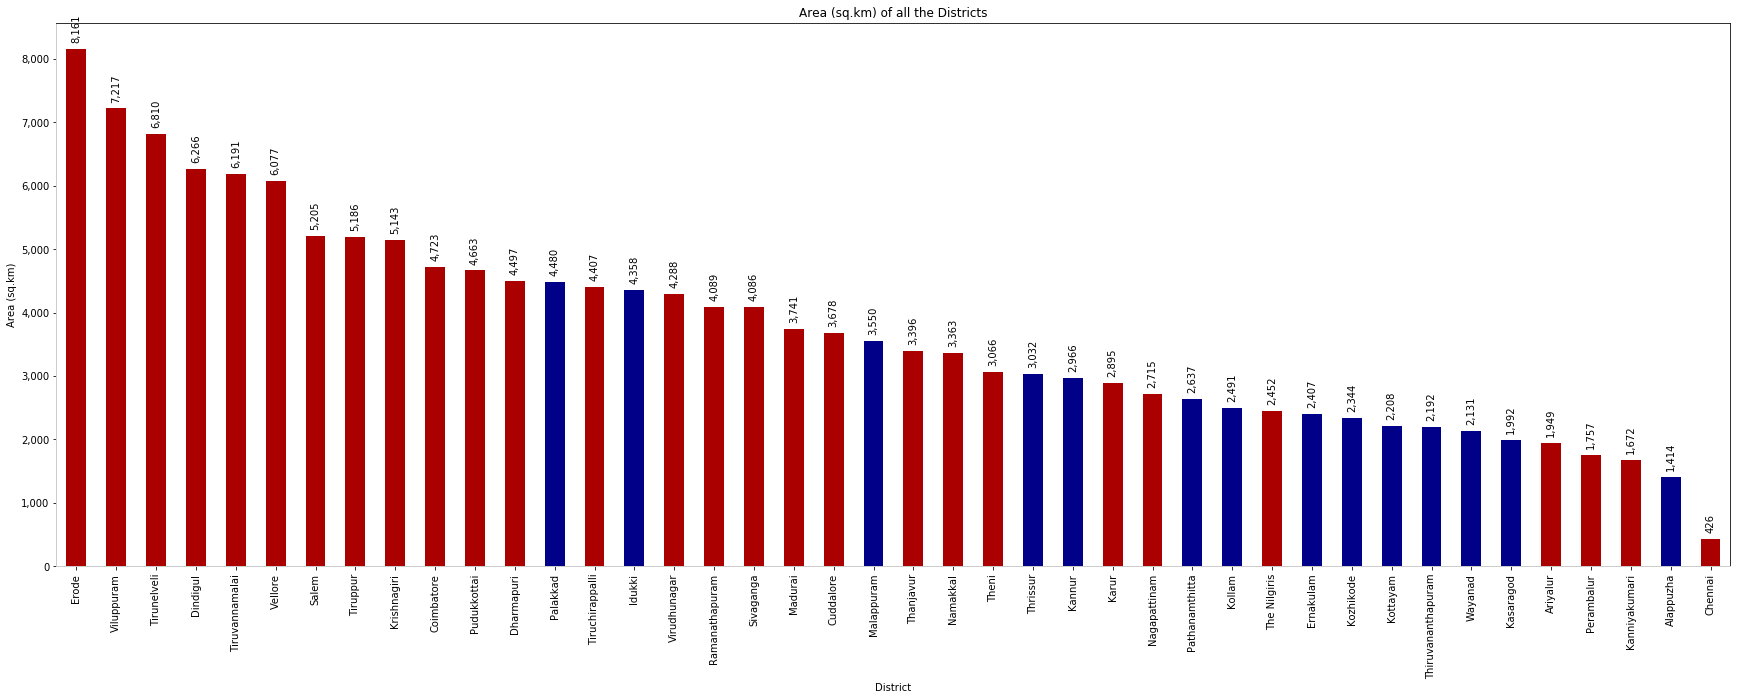

In [20]:
area_sorted = df.sort_values('Area_sq_km',ascending=False)
ax = area_sorted.plot(kind='bar', x='District', y='Area_sq_km',figsize=(30,10), color=['#AA0000' if row.State=="Tamil Nadu" else '#000088' for name,row in area_sorted.iterrows()])


area_label = ["{:,}".format(row.Area_sq_km) for name,row in area_sorted.iterrows()]
for i,child in enumerate(ax.get_children()[:area_sorted.index.size]):
    ax.text(i,child.get_bbox().y1+100,area_label[i], rotation='vertical',ha='center', va='bottom')

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.patch.set_facecolor('#FFFFFF')
plt.title('Area (sq.km) of all the Districts')
plt.ylabel('Area (sq.km)')
ax.spines['bottom'].set_color('#CCCCCC')
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_color('#CCCCCC')
ax.spines['left'].set_linewidth(1)
ax.get_legend().remove()

plt.show()


### ~Analysis of the Population of the districts

In [21]:
df.groupby(['State'])['Population'].sum().reset_index()

,State,Population
0,Kerala,33387677
1,Tamil Nadu,61406221


Let's look at the population of all the districts in Tamil Nadu and Kerala by visualizing the numbers on a bar chart.

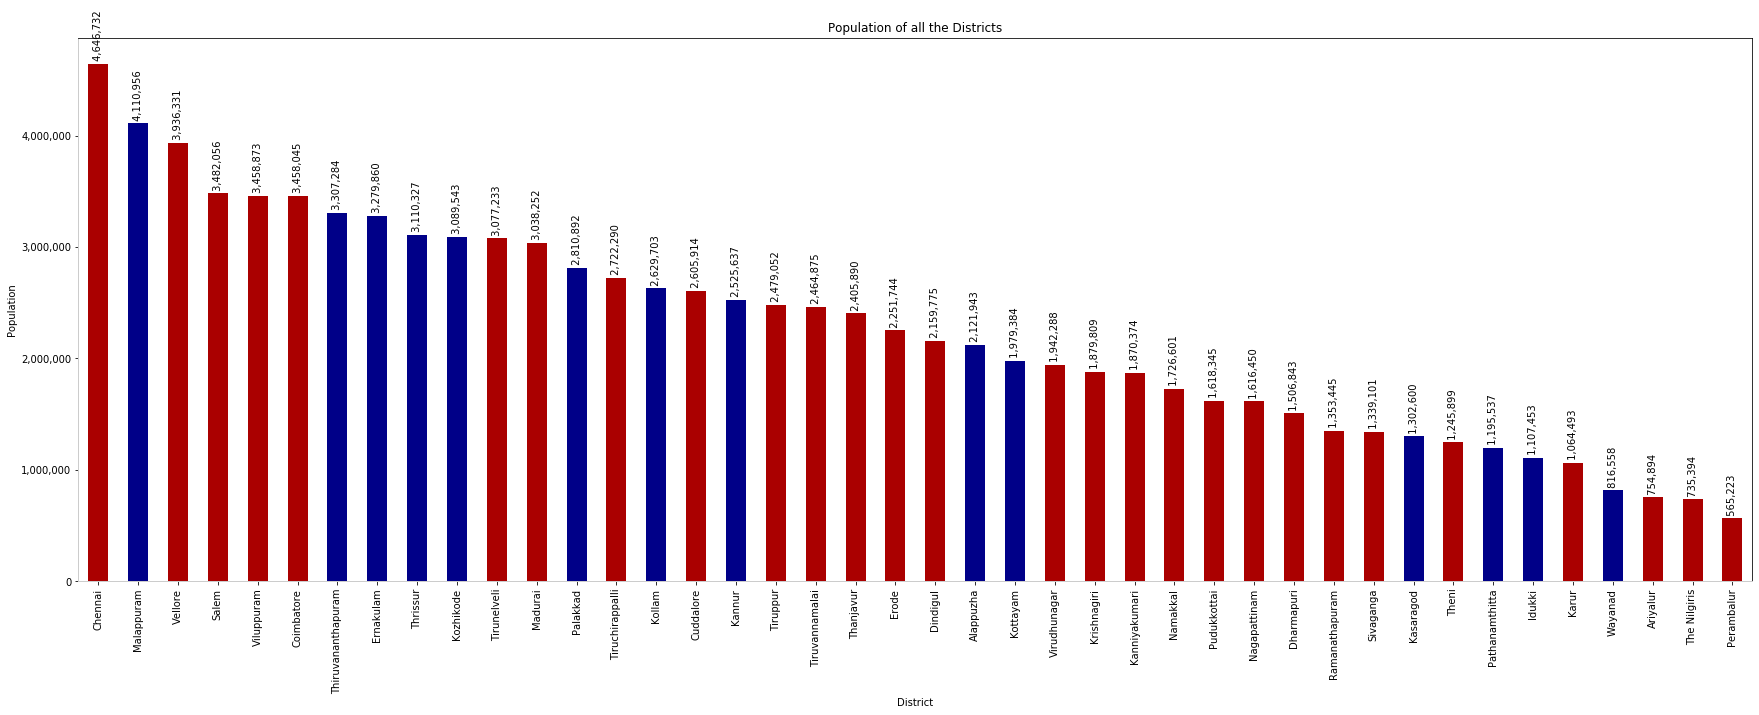

In [22]:
population_sorted = df.sort_values('Population',ascending=False)
ax = population_sorted.plot(kind='bar', x='District', y='Population',figsize=(30,10), color=['#AA0000' if row.State=="Tamil Nadu" else '#000088' for name,row in population_sorted.iterrows()])

population_label = [" {:,} ".format(row.Population) for name,row in population_sorted.iterrows()]
for i,child in enumerate(ax.get_children()[:population_sorted.index.size]):
    ax.text(i,child.get_bbox().y1+100,population_label[i], rotation='vertical',ha='center', va='bottom')

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.patch.set_facecolor('#FFFFFF')
plt.title('Population of all the Districts')
plt.ylabel('Population')
ax.spines['bottom'].set_color('#CCCCCC')
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_color('#CCCCCC')
ax.spines['left'].set_linewidth(1)
ax.get_legend().remove()

plt.show()


### ~Analysis of the Literacy Percentage of all the districts

Let's plot the literacy percentage of the districts in Tamil Nadu and Kerala on a bar chart.

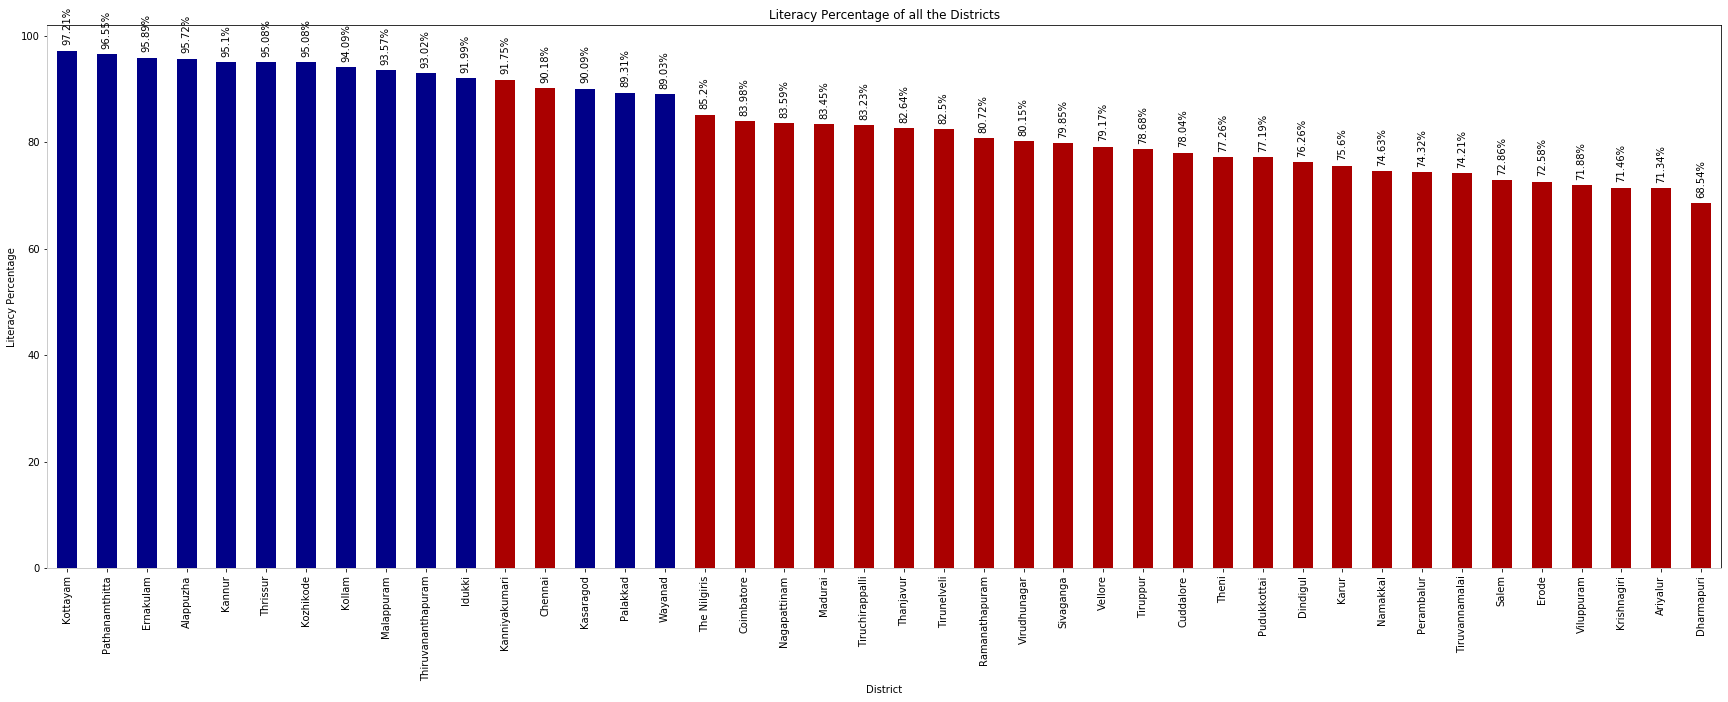

In [23]:
literacy_sorted = df.sort_values('Literacy',ascending=False)
ax = literacy_sorted.plot(kind='bar', x='District', y='Literacy',figsize=(30,10), color=['#AA0000' if row.State=="Tamil Nadu" else '#000088' for name,row in literacy_sorted.iterrows()])


literacy_label = ["{}%".format(row.Literacy) for name,row in literacy_sorted.iterrows()]
for i,child in enumerate(ax.get_children()[:literacy_sorted.index.size]):
    ax.text(i,child.get_bbox().y1+1,literacy_label[i], rotation='vertical',ha='center', va='bottom')

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.patch.set_facecolor('#FFFFFF')
plt.title('Literacy Percentage of all the Districts')
plt.ylabel('Literacy Percentage')
ax.spines['bottom'].set_color('#CCCCCC')
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_color('#CCCCCC')
ax.spines['left'].set_linewidth(1)
ax.get_legend().remove()

ax


### ~Analyze the top venues in the districts and cluster them

Let's retrieve the top 500 venues within a radius of 100km from the center of the districts and put them in a dataframe.

In [24]:
CLIENT_ID = 'GT3SCXXA3BRPIIH5ZT2XNDRGIE0I01K35WGHOVIDDFLFTVGI' # your Foursquare ID
CLIENT_SECRET = 'WIHAD0CQOJJUW2QOAEMTX0H5M1PPORO2WNKR4CFJNTZBKFUI' # your Foursquare Secret
VERSION = '20190823' # Foursquare API version

LIMIT=500
def getNearbyVenues(states,districts, latitudes, longitudes, radius=100000):
    
    venues_list=[]
    for state, district, lat, lng in zip(states,districts, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION,
            lat, 
            lng, 
            radius,
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            state,
            district, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['State',
                  'District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
   
    return(nearby_venues)

district_venues = getNearbyVenues(states=df['State'],
                                   districts=df['District'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

print(district_venues.shape)
district_venues.head()

(3309, 8)


,State,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Tamil Nadu,Ariyalur,11.135771,79.07232,Tanjavur Chola's Big Temple,10.782957,79.132663,Historic Site
1,Tamil Nadu,Ariyalur,11.135771,79.07232,Kanappas,10.827181,78.683790,Indian Restaurant
2,Tamil Nadu,Ariyalur,11.135771,79.07232,la cinemas,10.827180,78.689511,Multiplex
3,Tamil Nadu,Ariyalur,11.135771,79.07232,Seakings,10.823845,78.693157,Ice Cream Shop
4,Tamil Nadu,Ariyalur,11.135771,79.07232,Tanjavur,10.777151,79.142018,Historic Site


Let's group rows by district and take the mean of the frequency of occurrences of each venue category. Using these details, now filter the top most common venues for each district. Then, put them in a dataframe for clustering later.

In [25]:
# one hot encoding
district_onehot = pd.get_dummies(district_venues[['Venue Category']], prefix="", prefix_sep="")

# add state and district columns back to dataframe
district_onehot['State'] = district_venues['State'] 
district_onehot['District'] = district_venues['District'] 


# move district column to the first column
fixed_columns = [district_onehot.columns[-1]] + list(district_onehot.columns[:-1])
district_onehot = district_onehot[fixed_columns]

district_grouped = district_onehot.groupby(['State','District']).mean().reset_index()

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['State','District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
district_venues_sorted = pd.DataFrame(columns=columns)
district_venues_sorted['State'] = district_grouped['State']
district_venues_sorted['District'] = district_grouped['District']

for ind in np.arange(district_grouped.shape[0]):
    district_venues_sorted.iloc[ind, 2:] = return_most_common_venues(district_grouped.iloc[ind, 1:], num_top_venues)

district_venues_sorted=district_venues_sorted.sort_values(by='District')
#district_venues_sorted
district_grouped

,State,District,Afghan Restaurant,Airport Service,Airport Terminal,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,...,Theater,Theme Park,Trail,Train Station,Udupi Restaurant,Vegetarian / Vegan Restaurant,Video Store,Waterfall,Yoga Studio,Zoo
0,Kerala,Alappuzha,0.000000,0.01,0.00000,0.00000,0.000000,0.020000,0.00,0.040000,...,0.01,0.01000,0.000000,0.000000,0.00,0.030000,0.000000,0.000000,0.000000,0.000000
1,Kerala,Ernakulam,0.000000,0.01,0.00000,0.00000,0.000000,0.020000,0.00,0.020000,...,0.01,0.01000,0.000000,0.000000,0.00,0.050000,0.000000,0.010000,0.000000,0.000000
2,Kerala,Idukki,0.000000,0.01,0.00000,0.00000,0.000000,0.020000,0.00,0.020000,...,0.01,0.01000,0.010000,0.000000,0.00,0.030000,0.000000,0.010000,0.000000,0.000000
3,Kerala,Kannur,0.000000,0.00,0.00000,0.00000,0.000000,0.000000,0.00,0.020000,...,0.00,0.00000,0.000000,0.030000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
4,Kerala,Kasaragod,0.000000,0.00,0.00000,0.00000,0.000000,0.000000,0.00,0.020000,...,0.00,0.00000,0.000000,0.010000,0.01,0.030000,0.000000,0.000000,0.000000,0.000000
5,Kerala,Kollam,0.000000,0.00,0.00000,0.00000,0.010000,0.000000,0.00,0.010000,...,0.00,0.00000,0.000000,0.000000,0.00,0.020000,0.000000,0.000000,0.000000,0.000000
6,Kerala,Kottayam,0.000000,0.01,0.00000,0.00000,0.000000,0.020000,0.00,0.020000,...,0.01,0.01000,0.000000,0.000000,0.00,0.040000,0.000000,0.010000,0.000000,0.000000
7,Kerala,Kozhikode,0.000000,0.00,0.00000,0.00000,0.000000,0.000000,0.00,0.000000,...,0.00,0.00000,0.000000,0.026667,0.00,0.013333,0.000000,0.000000,0.000000,0.013333
8,Kerala,Malappuram,0.000000,0.00,0.00000,0.00000,0.000000,0.000000,0.00,0.020000,...,0.00,0.00000,0.000000,0.000000,0.00,0.030000,0.000000,0.000000,0.010000,0.010000
9,Kerala,Palakkad,0.000000,0.01,0.00000,0.00000,0.000000,0.010000,0.00,0.030000,...,0.01,0.01000,0.000000,0.000000,0.00,0.040000,0.000000,0.010000,0.010000,0.010000


Using K-mean clusters, we cluster the districts into 5 clusters and put them in a dataframe. Then, let's visualize them on a folium map.

In [26]:
# set number of clusters
kclusters = 3

district_grouped_clustering = district_grouped.drop(['State','District'], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(district_grouped_clustering)

# check cluster labels generated for each row in the dataframe
#kmeans.labels_[0:10] 

# add clustering labels
district_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

district_merged = df

#Drop State column
district_venues_sorted = district_venues_sorted.drop('State', axis=1)

# merge district_grouped with df to add latitude/longitude for each district
district_merged = district_merged.join(district_venues_sorted.set_index('District'),on='District')

district_merged.head() # check the last columns!

,State,District,Population,Area_sq_km,Literacy,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Tamil Nadu,Ariyalur,754894,1949,71.34,11.135771,79.072320,0,Indian Restaurant,Bus Station,Beach,Hotel,Historic Site,Hotel Bar,Ice Cream Shop,Italian Restaurant,Garden,Multiplex
1,Tamil Nadu,Chennai,4646732,426,90.18,13.080172,80.283833,0,Indian Restaurant,Hotel,Café,Ice Cream Shop,Beach,Multiplex,Shopping Mall,Juice Bar,Sandwich Place,South Indian Restaurant
2,Tamil Nadu,Coimbatore,3458045,4723,83.98,11.001812,76.962842,0,Indian Restaurant,Multiplex,Café,Ice Cream Shop,Movie Theater,Resort,South Indian Restaurant,Dessert Shop,Hotel,Vegetarian / Vegan Restaurant
3,Tamil Nadu,Cuddalore,2605914,3678,78.04,11.742694,79.750306,0,Indian Restaurant,Hotel,Beach,Café,Pizza Place,Vegetarian / Vegan Restaurant,Bakery,Coffee Shop,Italian Restaurant,Train Station
4,Tamil Nadu,Dharmapuri,1506843,4497,68.54,12.134799,78.158986,0,Indian Restaurant,Hotel,Café,Pizza Place,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Department Store,Scenic Lookout,Coffee Shop,Ice Cream Shop


In [27]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=7)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(district_merged['Latitude'], district_merged['Longitude'], district_merged['District'], district_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Now, it's time to examine the clusters. For the sake of this project, we give a category for each cluster.

**Cluster 1:** Tourism and Metropolitan Districts

In [28]:
district_merged.loc[district_merged['Cluster Labels'] == 0, district_merged.columns[[0,1] + list(range(5, district_merged.shape[1]))]]

,State,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Tamil Nadu,Ariyalur,11.135771,79.072320,0,Indian Restaurant,Bus Station,Beach,Hotel,Historic Site,Hotel Bar,Ice Cream Shop,Italian Restaurant,Garden,Multiplex
1,Tamil Nadu,Chennai,13.080172,80.283833,0,Indian Restaurant,Hotel,Café,Ice Cream Shop,Beach,Multiplex,Shopping Mall,Juice Bar,Sandwich Place,South Indian Restaurant
2,Tamil Nadu,Coimbatore,11.001812,76.962842,0,Indian Restaurant,Multiplex,Café,Ice Cream Shop,Movie Theater,Resort,South Indian Restaurant,Dessert Shop,Hotel,Vegetarian / Vegan Restaurant
3,Tamil Nadu,Cuddalore,11.742694,79.750306,0,Indian Restaurant,Hotel,Beach,Café,Pizza Place,Vegetarian / Vegan Restaurant,Bakery,Coffee Shop,Italian Restaurant,Train Station
4,Tamil Nadu,Dharmapuri,12.134799,78.158986,0,Indian Restaurant,Hotel,Café,Pizza Place,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Department Store,Scenic Lookout,Coffee Shop,Ice Cream Shop
5,Tamil Nadu,Dindigul,10.365541,77.969585,0,Indian Restaurant,Hotel,Café,Resort,Ice Cream Shop,Bakery,Shopping Mall,Multiplex,Train Station,Pizza Place
6,Tamil Nadu,Erode,11.330648,77.727652,0,Indian Restaurant,Ice Cream Shop,Hotel,Café,Dessert Shop,Multiplex,Vegetarian / Vegan Restaurant,Pizza Place,Scenic Lookout,Shopping Mall
7,Tamil Nadu,Kanniyakumari,8.087964,77.546741,0,Indian Restaurant,Restaurant,Beach,Hotel,Bakery,Resort,Ice Cream Shop,Movie Theater,Multiplex,Coffee Shop
8,Tamil Nadu,Karur,10.960405,78.077561,0,Indian Restaurant,Café,Hotel,Ice Cream Shop,Pizza Place,Multiplex,Dessert Shop,Coffee Shop,Restaurant,Bus Station
9,Tamil Nadu,Krishnagiri,12.513614,78.174025,0,Ice Cream Shop,Indian Restaurant,Hotel,Brewery,Café,Breakfast Spot,Shopping Mall,Pub,Lounge,Italian Restaurant


**Cluster 2:** Mix of Tourism and Residential Districts

In [29]:
district_merged.loc[district_merged['Cluster Labels'] == 1, district_merged.columns[[0,1] + list(range(5, district_merged.shape[1]))]]

,State,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Tamil Nadu,Pudukkottai,10.500000,78.833333,1,Indian Restaurant,Hotel,Train Station,Café,Shopping Mall,Multiplex,Asian Restaurant,Restaurant,Historic Site,Ice Cream Shop
17,Tamil Nadu,Salem,11.661201,78.160250,1,Indian Restaurant,Hotel,Ice Cream Shop,Scenic Lookout,Bus Station,South Indian Restaurant,Café,Restaurant,Pizza Place,Bakery
18,Tamil Nadu,Sivaganga,9.848688,78.487046,1,Indian Restaurant,Bakery,Café,Hotel,Cupcake Shop,Shopping Mall,Ice Cream Shop,Museum,Food,Fried Chicken Joint
22,Tamil Nadu,Tirunelveli,8.729526,77.685235,1,Indian Restaurant,Hotel,Bakery,Beach,Restaurant,Resort,Shopping Mall,Scenic Lookout,Burger Joint,Historic Site
33,Kerala,Kollam,8.887054,76.590706,1,Indian Restaurant,Resort,Beach,Hotel,Restaurant,Movie Theater,Café,Fast Food Restaurant,Coffee Shop,Multiplex
39,Kerala,Thiruvananthapuram,8.505891,76.957048,1,Indian Restaurant,Beach,Restaurant,Resort,Hotel,Bakery,Movie Theater,Multiplex,Coffee Shop,Burger Joint


**Cluster 3:** Residential and Urban Districts

In [30]:
district_merged.loc[district_merged['Cluster Labels'] == 2, district_merged.columns[[0,1] + list(range(5, district_merged.shape[1]))]]

,State,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Tamil Nadu,Madurai,9.926115,78.114098,2,Indian Restaurant,Café,Hotel,Bakery,Resort,Pizza Place,Bus Station,Restaurant,Shopping Mall,Ice Cream Shop
11,Tamil Nadu,Nagapattinam,10.764795,79.843078,2,Indian Restaurant,Beach,Historic Site,Hotel,Platform,Asian Restaurant,Garden,Museum,Pool,Bus Station
13,Tamil Nadu,The Nilgiris,11.400000,76.700000,2,Indian Restaurant,Resort,Café,Hotel,Ice Cream Shop,Mountain,Garden,Bakery,Shopping Mall,Dessert Shop
14,Tamil Nadu,Perambalur,11.235917,78.868811,2,Indian Restaurant,Hotel,Historic Site,Vegetarian / Vegan Restaurant,Train Station,Pizza Place,Ice Cream Shop,Bus Station,Bakery,Café
19,Tamil Nadu,Thanjavur,10.786027,79.138150,2,Indian Restaurant,Hotel,Train Station,Multiplex,Beach,Asian Restaurant,Historic Site,Pizza Place,Italian Restaurant,Department Store
20,Tamil Nadu,Theni,10.010814,77.481010,2,Indian Restaurant,Hotel,Resort,Café,Bakery,Ice Cream Shop,Fried Chicken Joint,Movie Theater,Cupcake Shop,Park
21,Tamil Nadu,Tiruchirappalli,10.804973,78.687030,2,Indian Restaurant,Hotel,Train Station,Historic Site,Burger Joint,Hotel Bar,Ice Cream Shop,Italian Restaurant,Garden,Multicuisine Indian Restaurant
25,Tamil Nadu,Vellore,12.907175,79.130970,2,Indian Restaurant,Café,Hotel,Pizza Place,Department Store,Vegetarian / Vegan Restaurant,Train Station,Market,South Indian Restaurant,Bus Station
26,Tamil Nadu,Viluppuram,11.942589,79.495063,2,Indian Restaurant,Hotel,Beach,Café,Pizza Place,Vegetarian / Vegan Restaurant,Bakery,Coffee Shop,Italian Restaurant,South Indian Restaurant
36,Kerala,Malappuram,11.104052,76.115778,2,Indian Restaurant,Resort,Ice Cream Shop,Beach,Shopping Mall,Multiplex,Bakery,Mountain,Café,Hotel


## Discussion <a name="discussion"></a>
***

The categories given to each cluster is not crystal-clear. But I have tried to categorize them as much as I could. Below, you can find the insights from the analysis.

<ins>**Overall**</ins>

High Area: **Tamil Nadu - 118,119 sq.km**

High Population: **Tamil Nadu - 61.4M**

High Literacy Percentage: **Tamil Nadu**

Most common venue: **Indian Restaurants**

<ins>**Tamil Nadu**</ins>

Top District based on Population: **Chennai – 4.6M**

Top District based on Area: **Erode – 8,161 sq.km**

Top District based on Literacy: **Kanyakumari – 91.75%**


<ins>**Kerala**</ins>

Top District based on Population: **Palakkad – 2.8M**

Top District based on Palakkad: **Erode –4,480 sq.km**

Top District based on Literacy: **Kottayam – 97.21%**

## Conclusion <a name="conclusion"></a>
***

The main objective of this project was to determine the similarity and dissimilarity of both states. We have successfully compared both the states with our available resources on the basis of area, population, literacy percentage and common venue. Even though both these southern states are quite similar, we can’t guarantee it based on only these features. There are various other aspects that need to be considered to come to a definite point. As far as the clustering is done in this project, we can see that both the cities are similar in certain venues and also dissimilar in others. We can surely state that the most common venue in both states is Indian Restaurants. Also, due to the restriction in the radius that can measure in Foursquare API is limited to 100km, this analysis doesn’t include the entire area of the districts. So, in the future, I hope that this restriction is removed and further analysis can be conducted to help us get more insights into these districts.

## Thank You!
***